# Life Expectancy and GDP Project

This project will investigate if there is a strong corrrelation between the economic output of a country and the life expectancy of its citizens. The aims of this project is to appropriately clean and prepare data, create plots for analysis and seek to explain the findings from the study. 

Some of the questions this project will aim to answer:

+ Has life expectancy  and GDP increased over time?
+ Is there a correlation between the life expectancy and GDP of a country?
+ What is the average life expectancy and GDP?
+ What are the distributions of life expectancy and GDP?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

As always, first thing to do is to import the relevant modules.

In [234]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png2x')

## Loading and Exploring the data

In [235]:
# load data from csv into a dataframe and take a quick look using .head()
df = pd.read_csv('all_data.csv')
df.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


In [236]:
df.shape

(96, 4)

In [237]:
df.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

From the above we ca see the general format of the datafram and its contents. We also se that the datafram is composed of 96 rows and 4 columns, which at first glance seemed to have been assigned the correct data types. Now we can further explore the data.

In [238]:
print(df.Country.unique())
df.Country.nunique()

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


6

In [239]:
print(df.Year.unique())
df.Year.nunique()

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


16

We see that the data pertains to 6 countries: Chile, China, Germany, Mexico, USA and Zimbabwe over a 16 year time period from 2000 to 2015.

In [240]:
# for convenience and consistency with other columns we rename the life expectancy column and instances of United States of America 
df = df.rename({'Life expectancy at birth (years)': 'Life_expectancy'}, axis = 'columns')
df = df.replace('United States of America', 'USA')

### Exploratory Plots

Lets first explore the GDP.

/Users/mohshin/opt/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/mohshin/opt/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



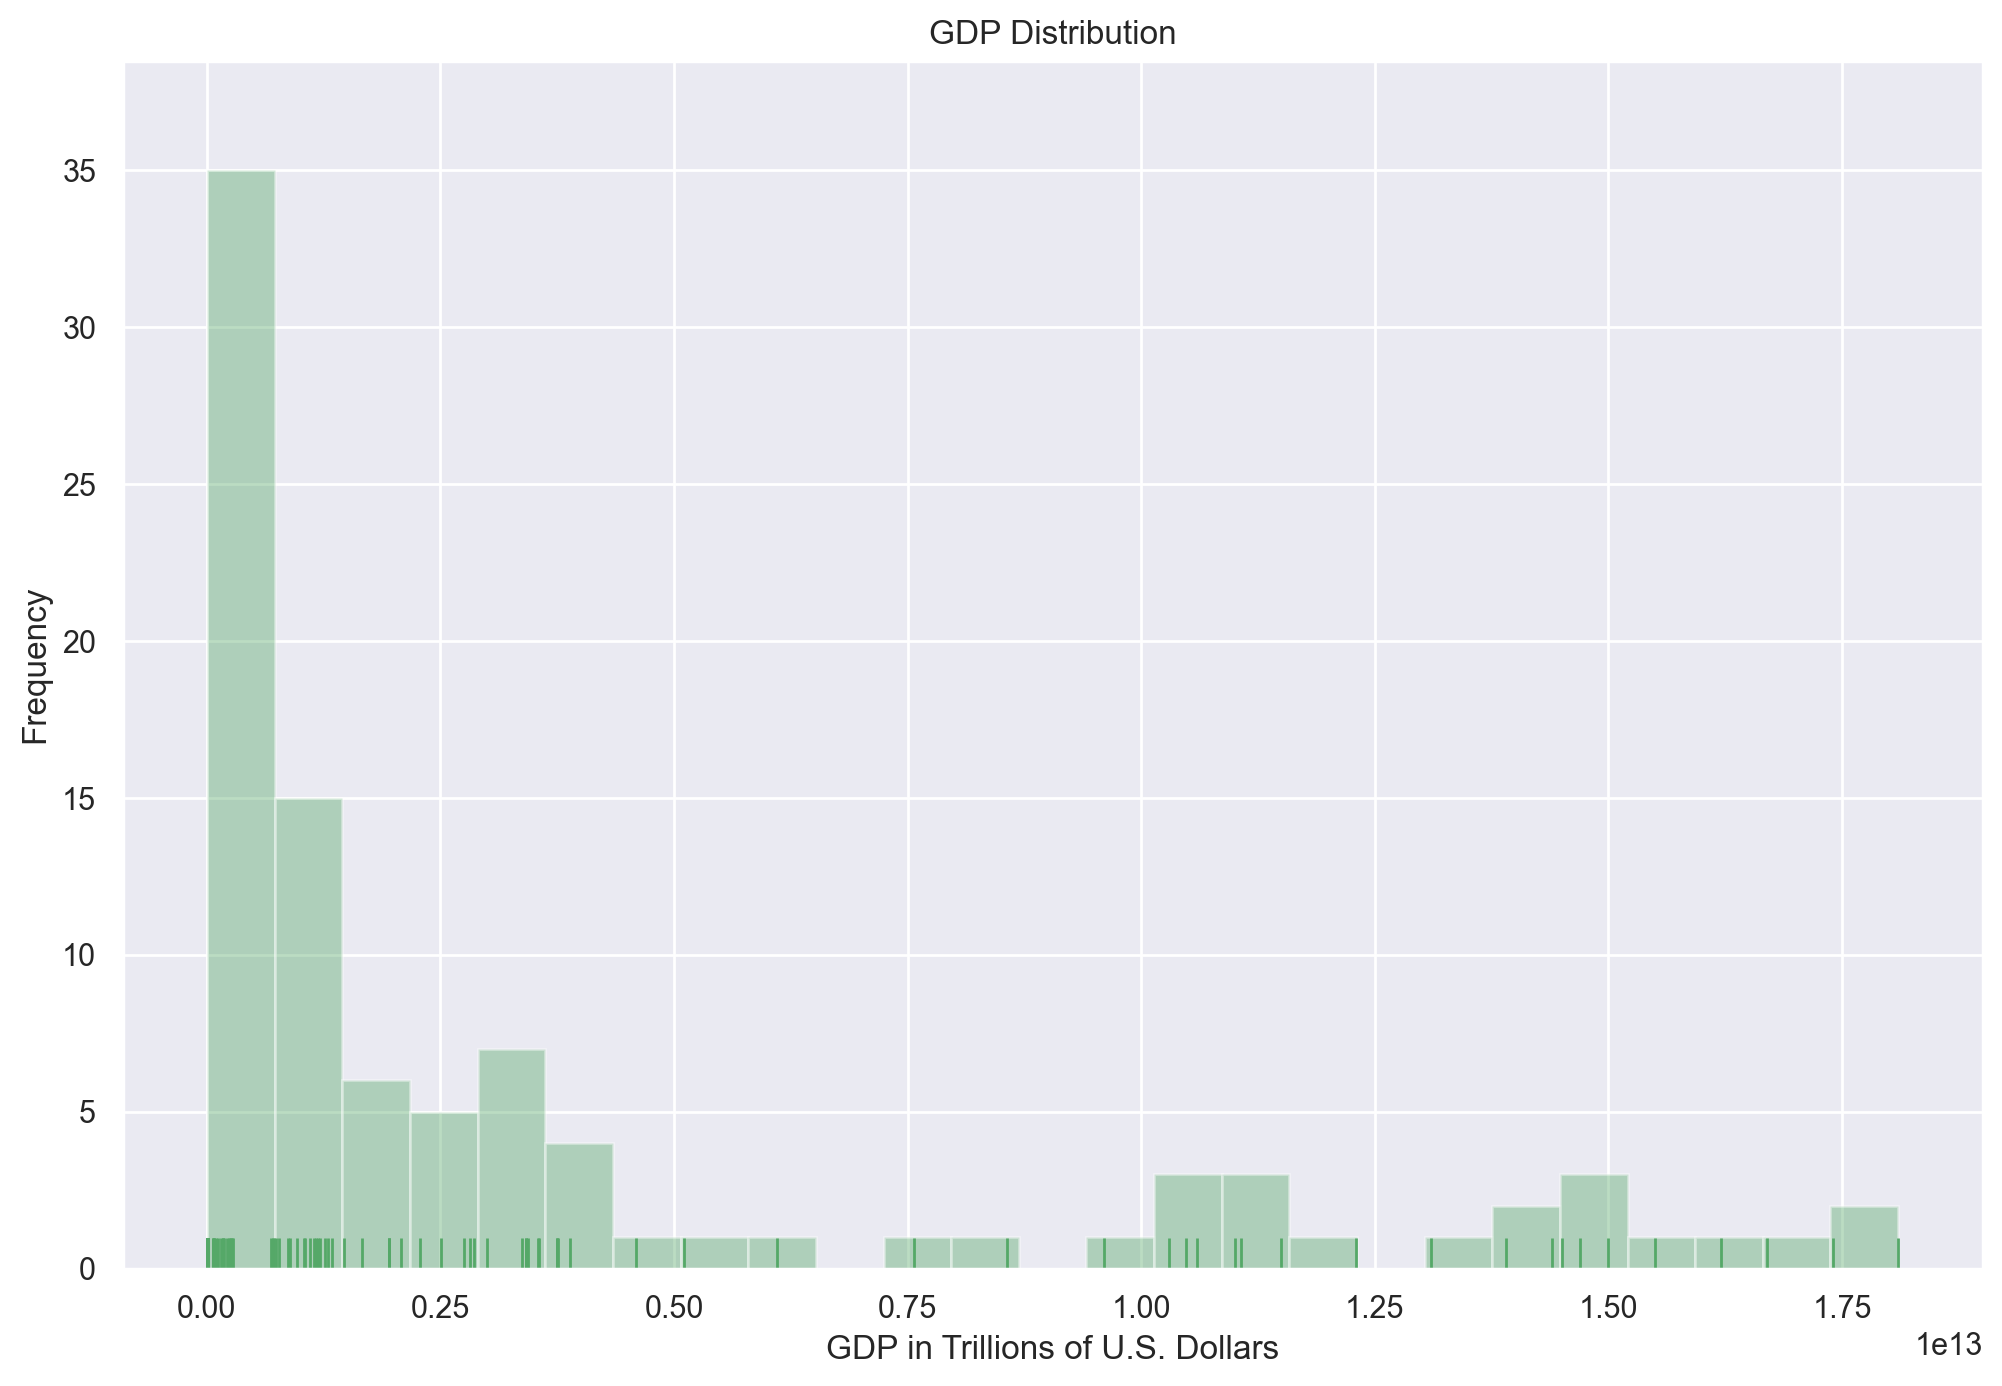

<Figure size 600x400 with 0 Axes>

In [241]:
sns.set_theme()
sns.set_color_codes()
plt.figure(figsize=(12,8))
sns.distplot(df.GDP, bins = 25, rug = True, kde = False, color = 'g')
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.ylabel('Frequency')
plt.title('GDP Distribution')

plt.show()
plt.clf()

In [ ]:
fig = px.histogram(df, x = 'GDP', marginal = 'rug', title = 'GDP Distribution', labels={'GDP': 'GDP in Trillions of USD'})
fig.update_layout(yaxis_title = 'Frequency')
fig.show()

I have chosen to make plots with both Seaborn and Plotly; seaborn because it is Codecademy standard; plotly purely for practice and the interactive user interface is nice to scope data with. The plots above show that the GDP distribution is right-skewed even though most of the data is on the left. We use the 'rug' option on both plots to visualise the distribution better as we are only interested in one quantative variable. The 'rugs' essentially act as hsitogram with 0 width bins or a one dimensional scatterplot.

Next we can explore the distribution of life expectancy in a similar fashion.

/Users/mohshin/opt/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/mohshin/opt/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



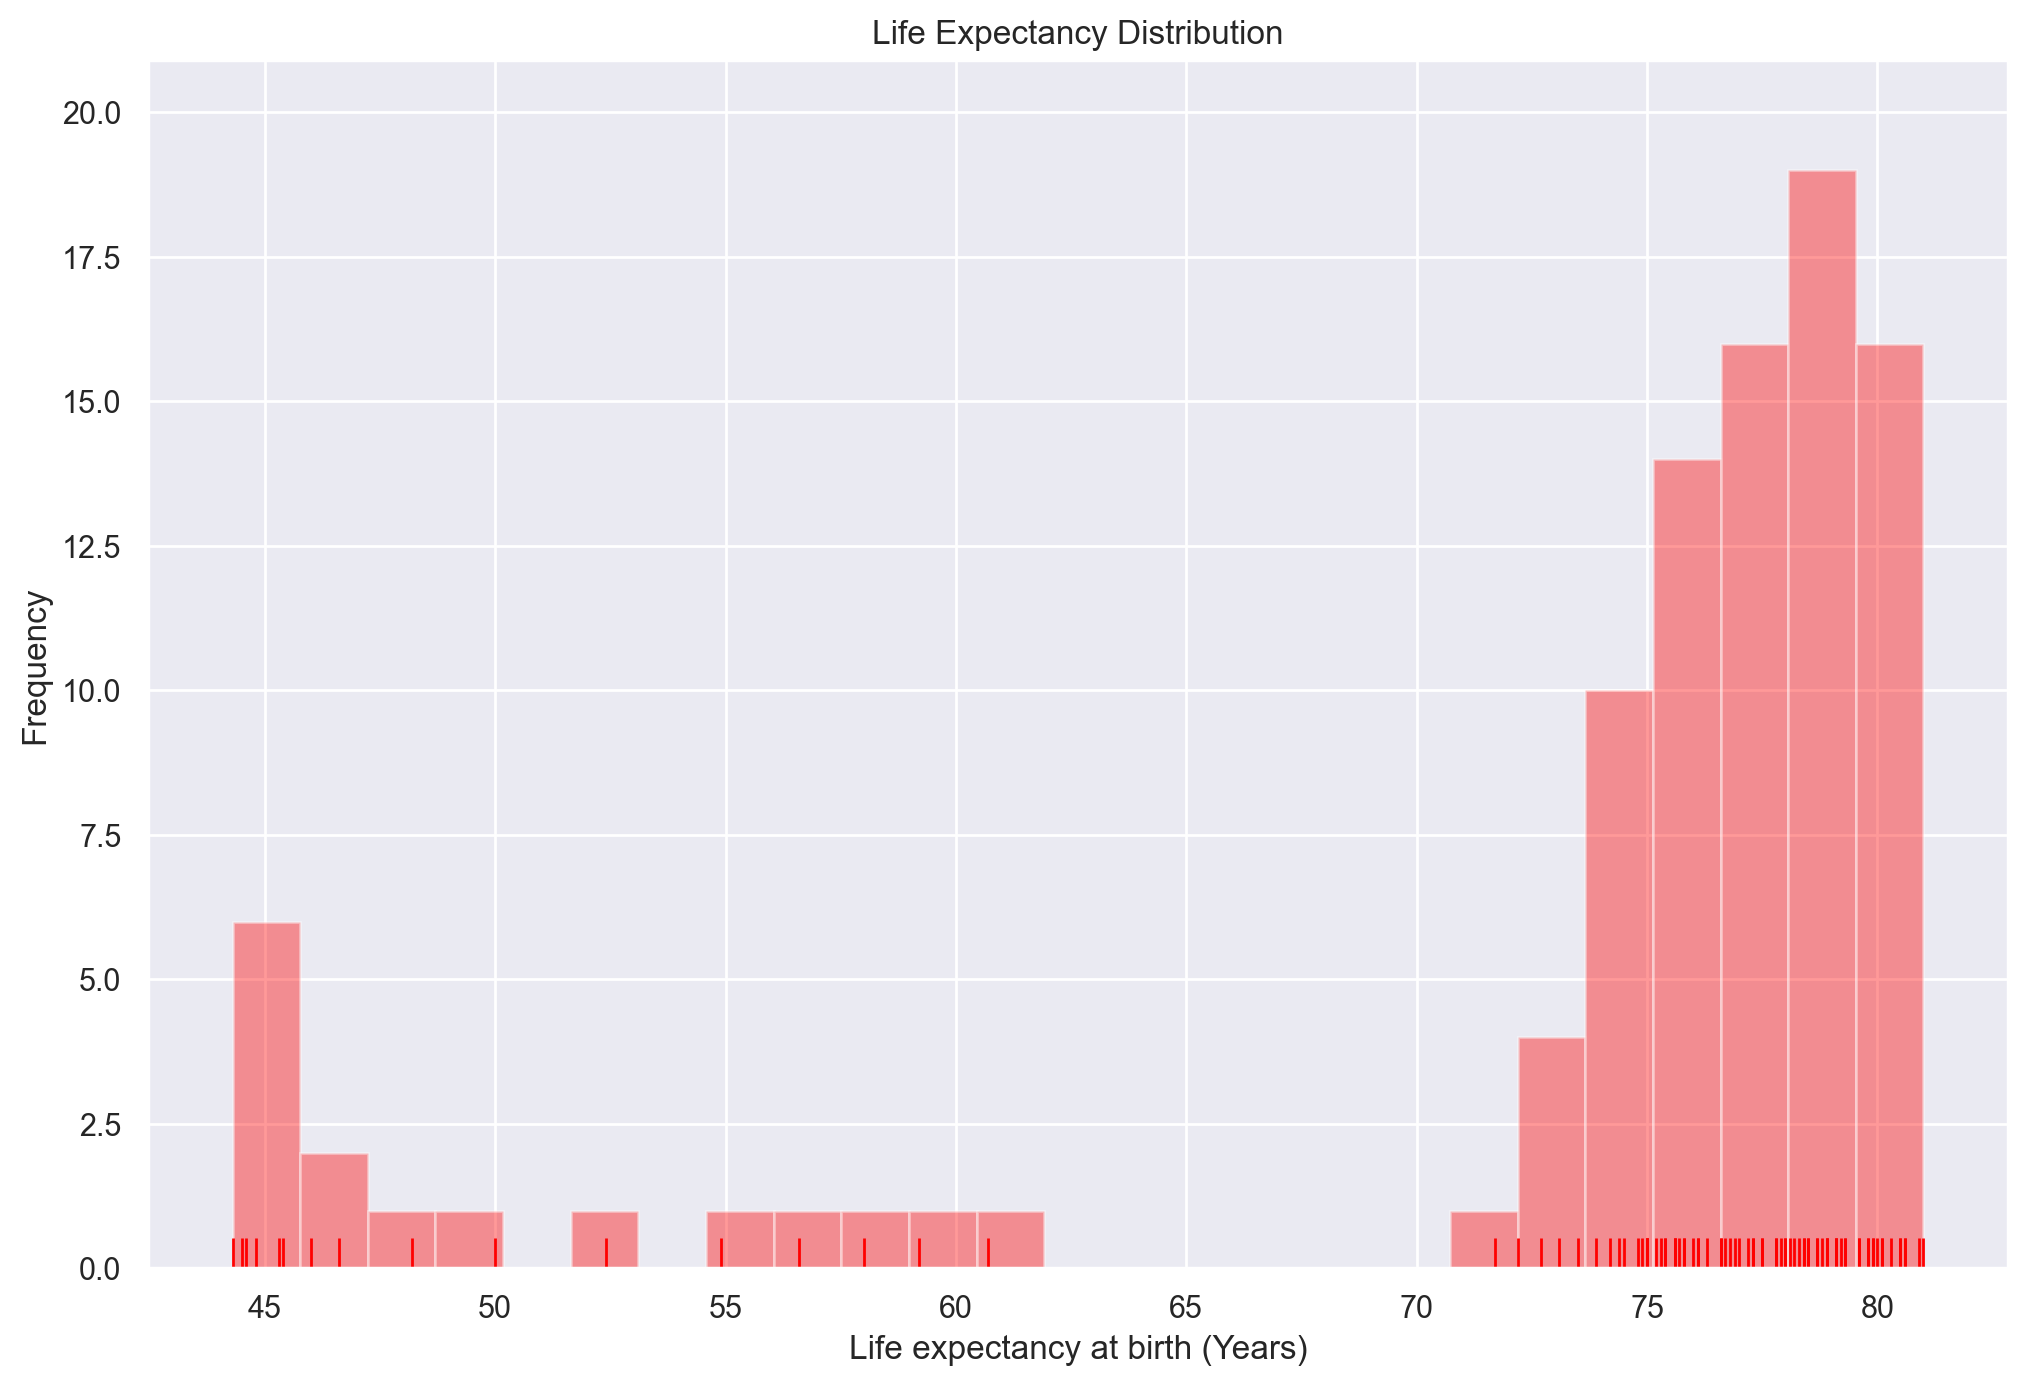

<Figure size 600x400 with 0 Axes>

In [243]:
plt.figure(figsize=(12,8))
sns.distplot(df.Life_expectancy, bins = 25, rug = True, kde = False, color = 'red')
plt.xlabel('Life expectancy at birth (Years)')
plt.ylabel('Frequency')
plt.title('Life Expectancy Distribution')

plt.show()
plt.clf()

In [ ]:
fig = px.histogram(df, x = 'Life_expectancy', marginal = 'rug', title = 'Life Expectancy Distribution',
     labels={'Life_expectancy': 'Life expectancy at birth (Years)'})
fig.update_layout(yaxis_title = 'Frequency')
fig.show()

The distribution of life expectancy exhibits opposite properties of the distribution of GDP, this time the distribution is left-skewed whilst most of the data is on the right.

Now that we have seen the general distributions of both life expectancy and GDP we can break this data up by country and plot the averages for each. 

In [245]:
dfmeans = df.drop('Year', axis = 1).groupby(df.Country).mean().reset_index()
dfmeans

,Country,Life_expectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,USA,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


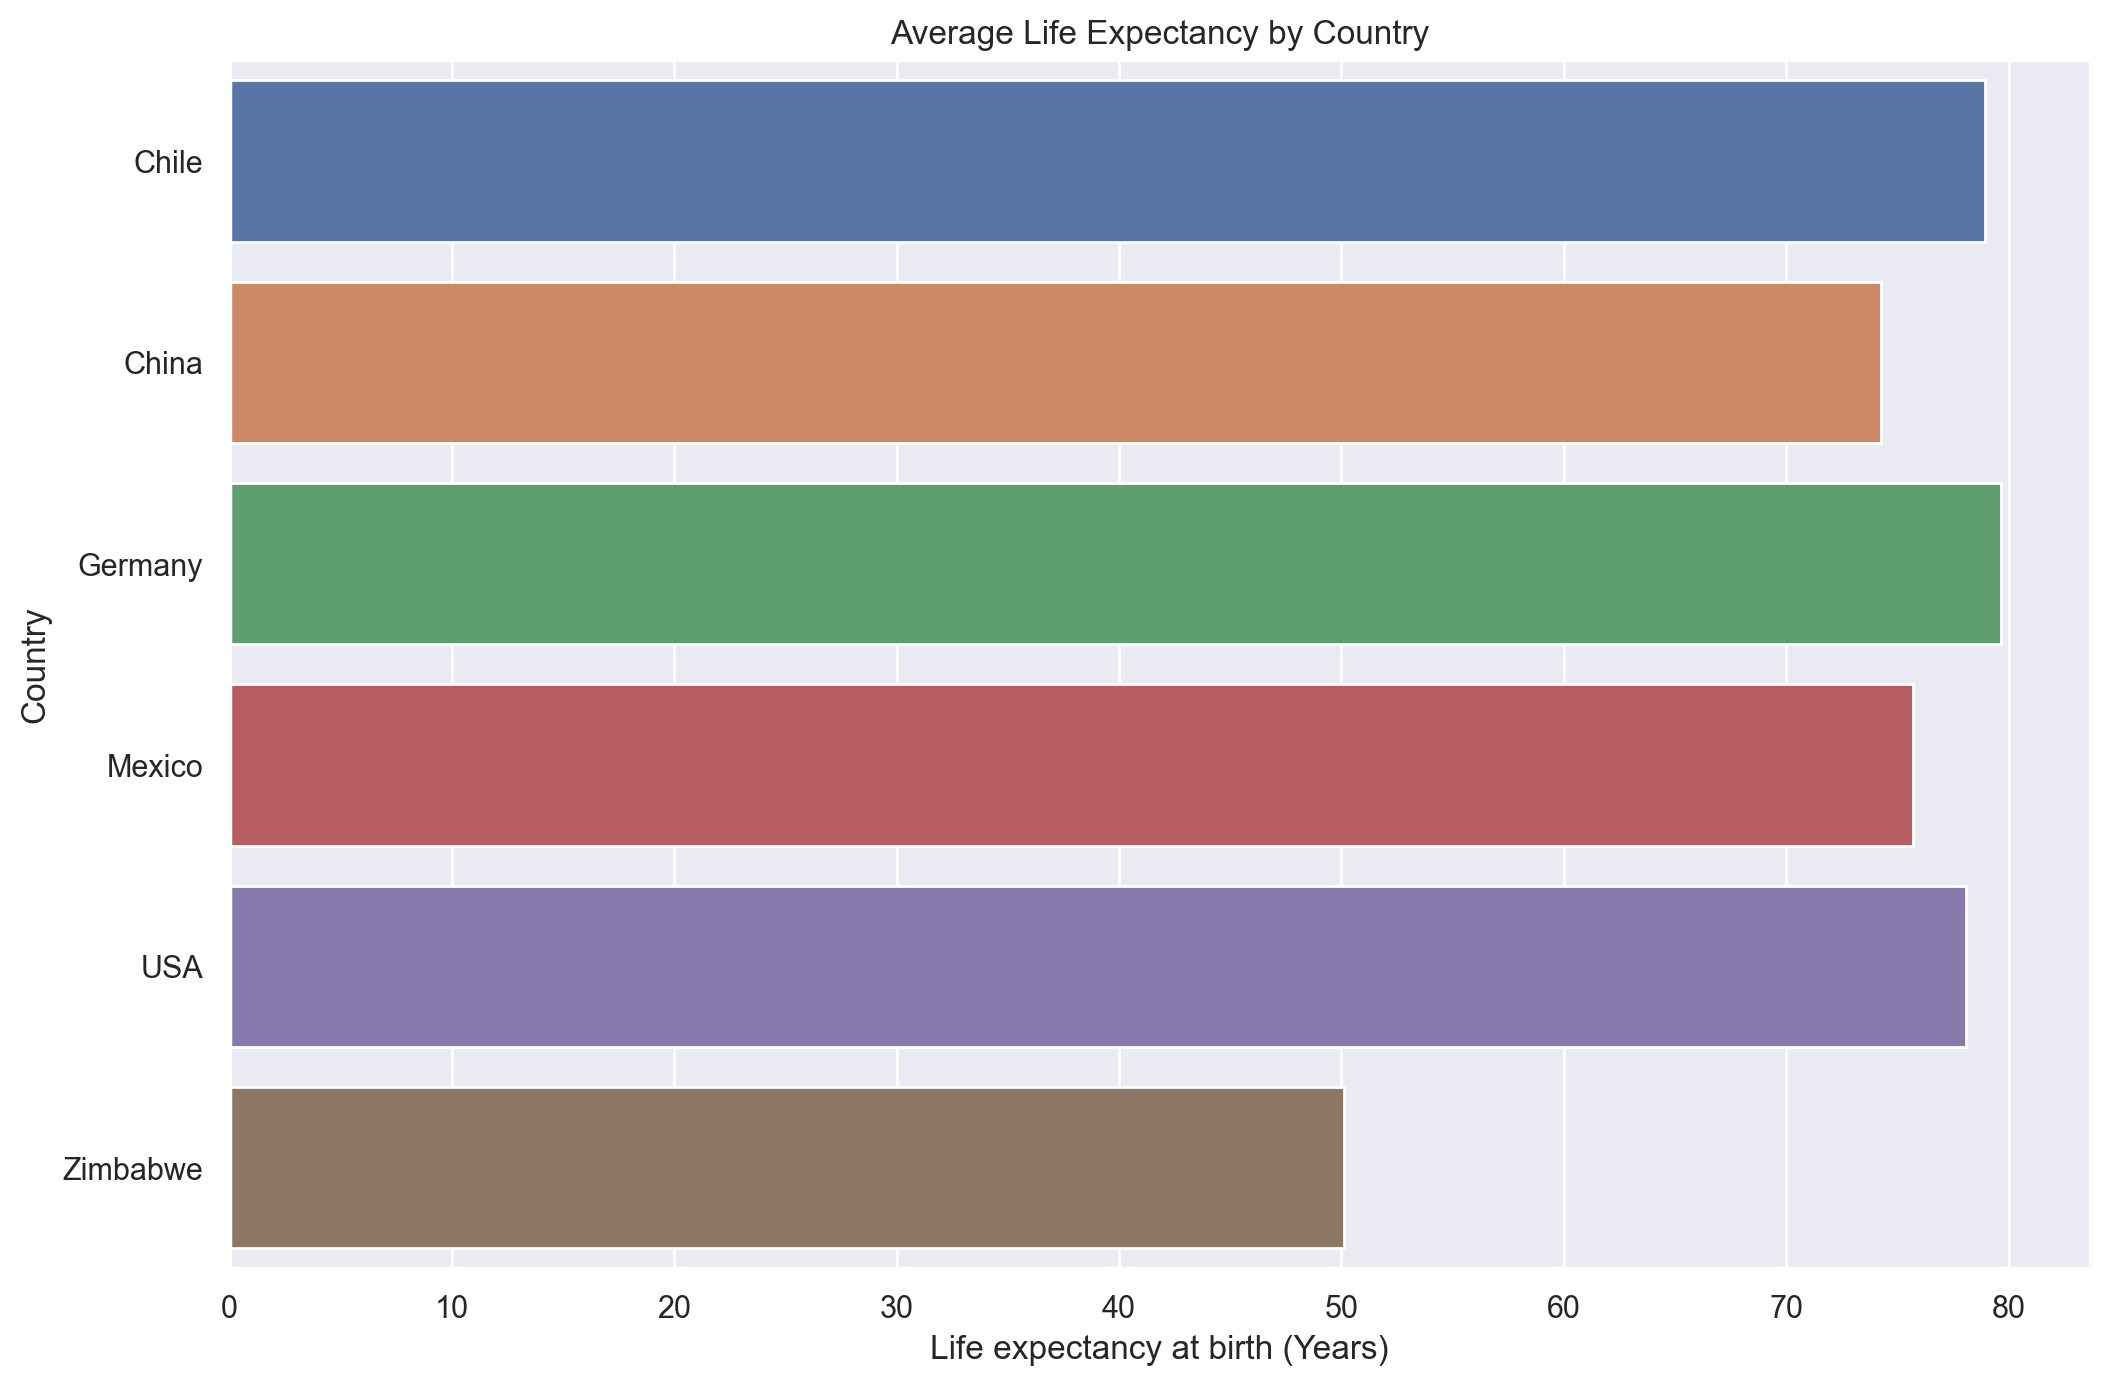

<Figure size 600x400 with 0 Axes>

In [246]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Life_expectancy', y = 'Country', data = dfmeans)
plt.xlabel('Life expectancy at birth (Years)')
plt.title('Average Life Expectancy by Country')

plt.show()
plt.clf()

In [ ]:
fig = px.bar(dfmeans, x = 'Life_expectancy', y = 'Country', 
    labels = {'Life_expectancy': 'Life expectancy at birth (Years)'}, title = 'Average Life Expectancy by Country')
fig.show()

All countries have a fairly high average life expectancy (around mid 70s+) except for Zimbabwe. This could explain the left-skew of the life expectancy distribution.

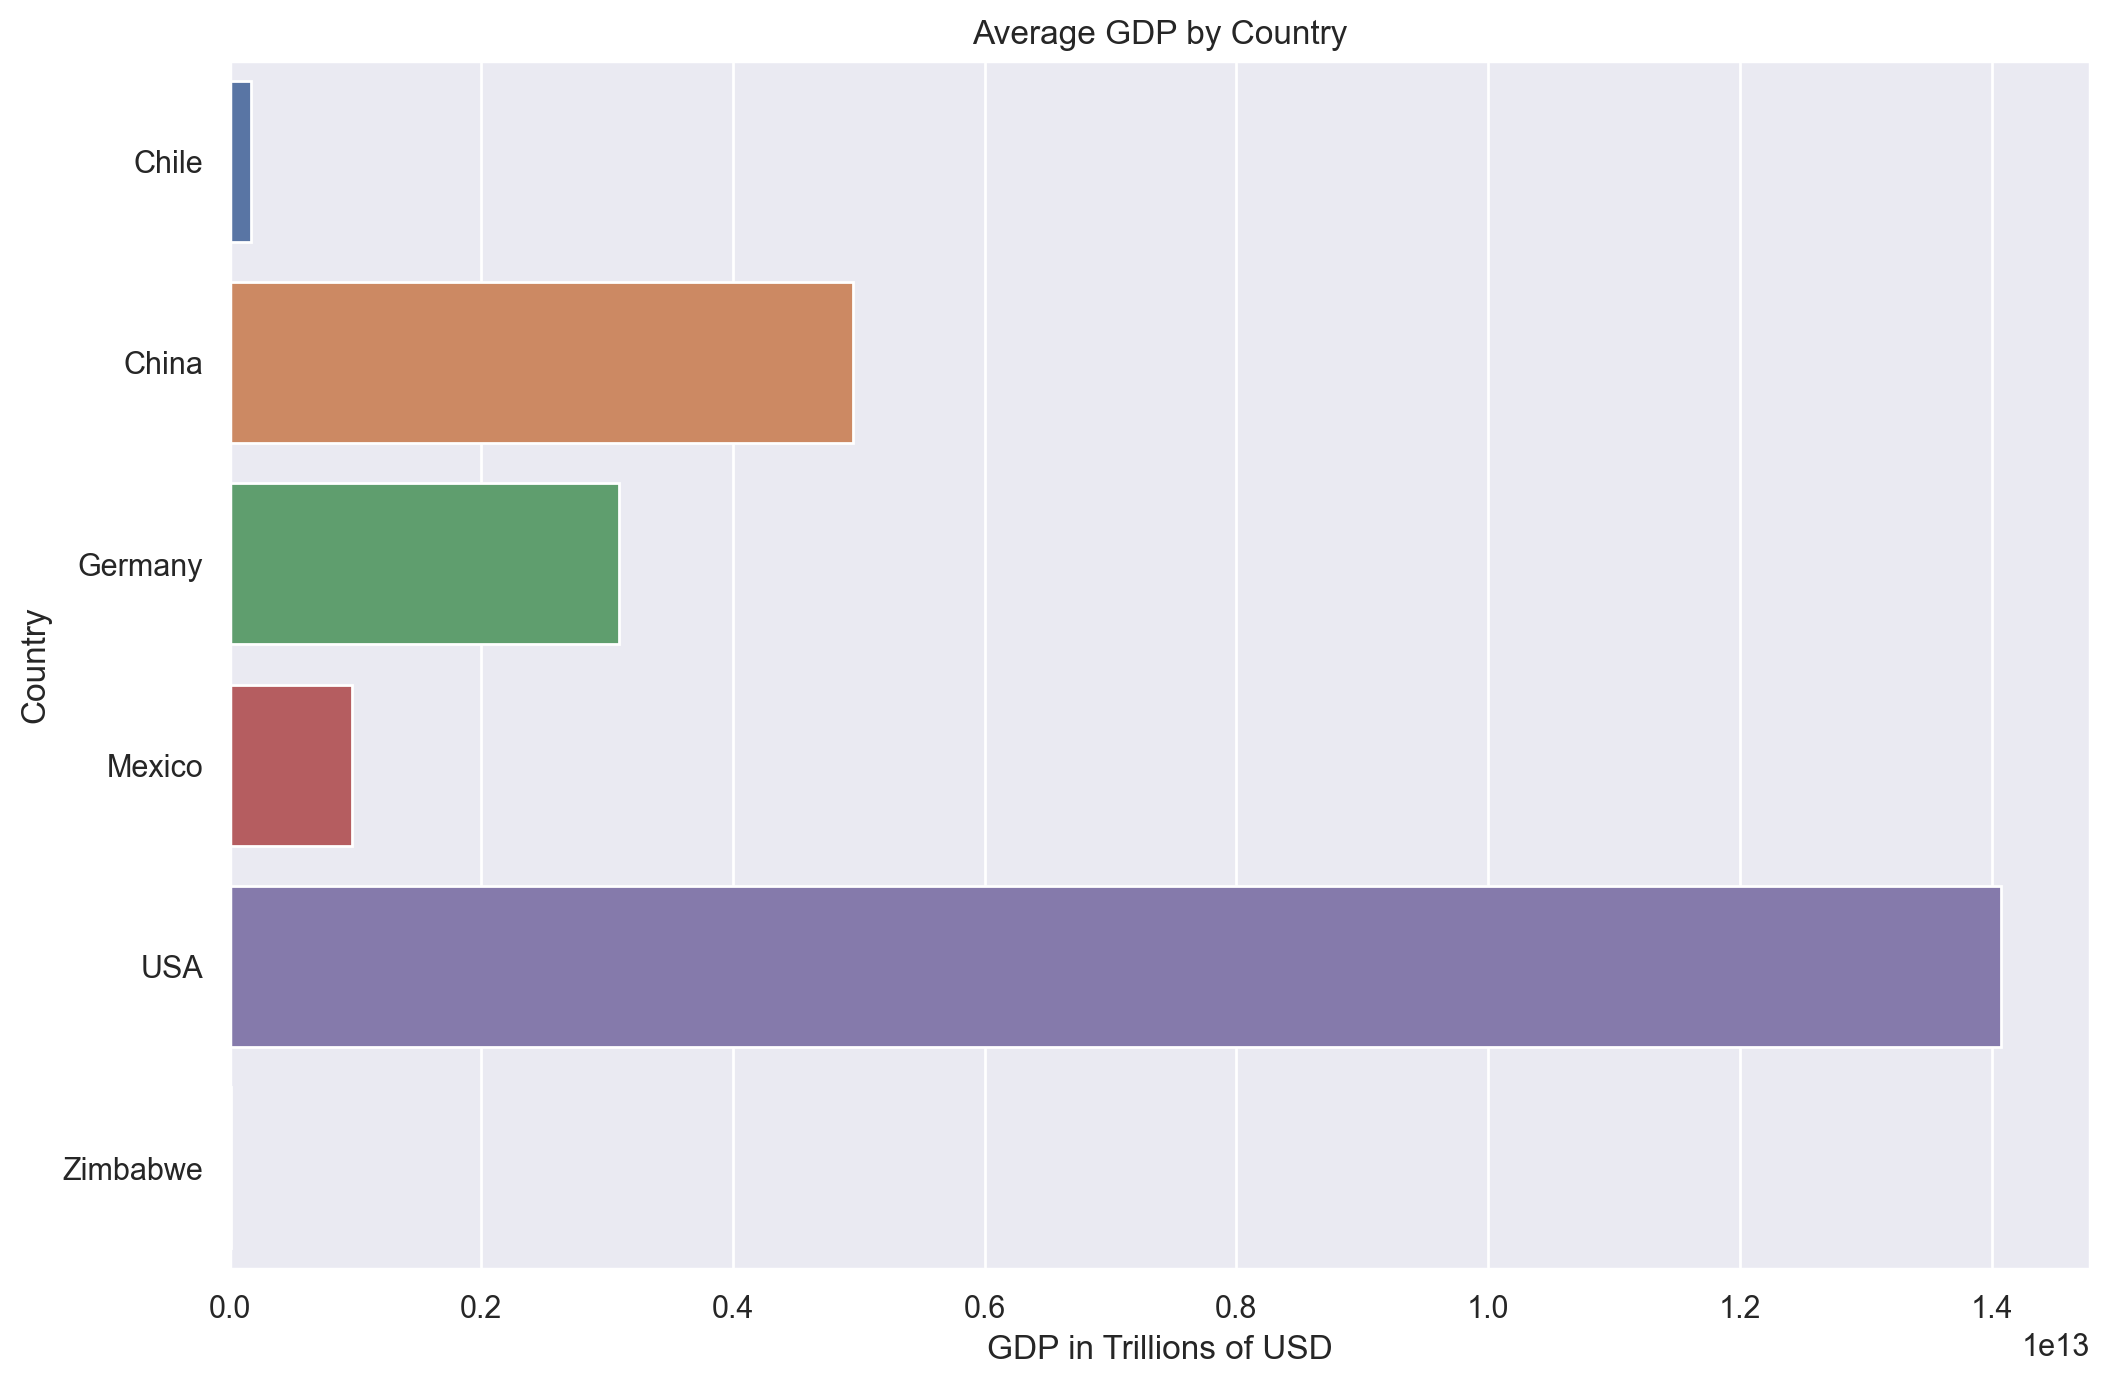

<Figure size 600x400 with 0 Axes>

In [248]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'GDP', y = 'Country', data = dfmeans)
plt.xlabel('GDP in Trillions of USD')
plt.title('Average GDP by Country')

plt.show()
plt.clf()

In [ ]:
fig = px.bar(dfmeans, x = 'GDP', y = 'Country', labels = {'GDP': 'GDP in Trillions of USD'}, title = 'Average GDP by Country')
fig.show()

USA has a much higher average GDP compared to the rest of the countries. Zimbabwe cannot be seen on the plot and Chile is also fairly low. Mexico, Germany and China are relatively close.

## Data Over Time

Next in the project we will investigate how life expectancy and GDP changed with respect to time in the data. To do this we will plot line charts.

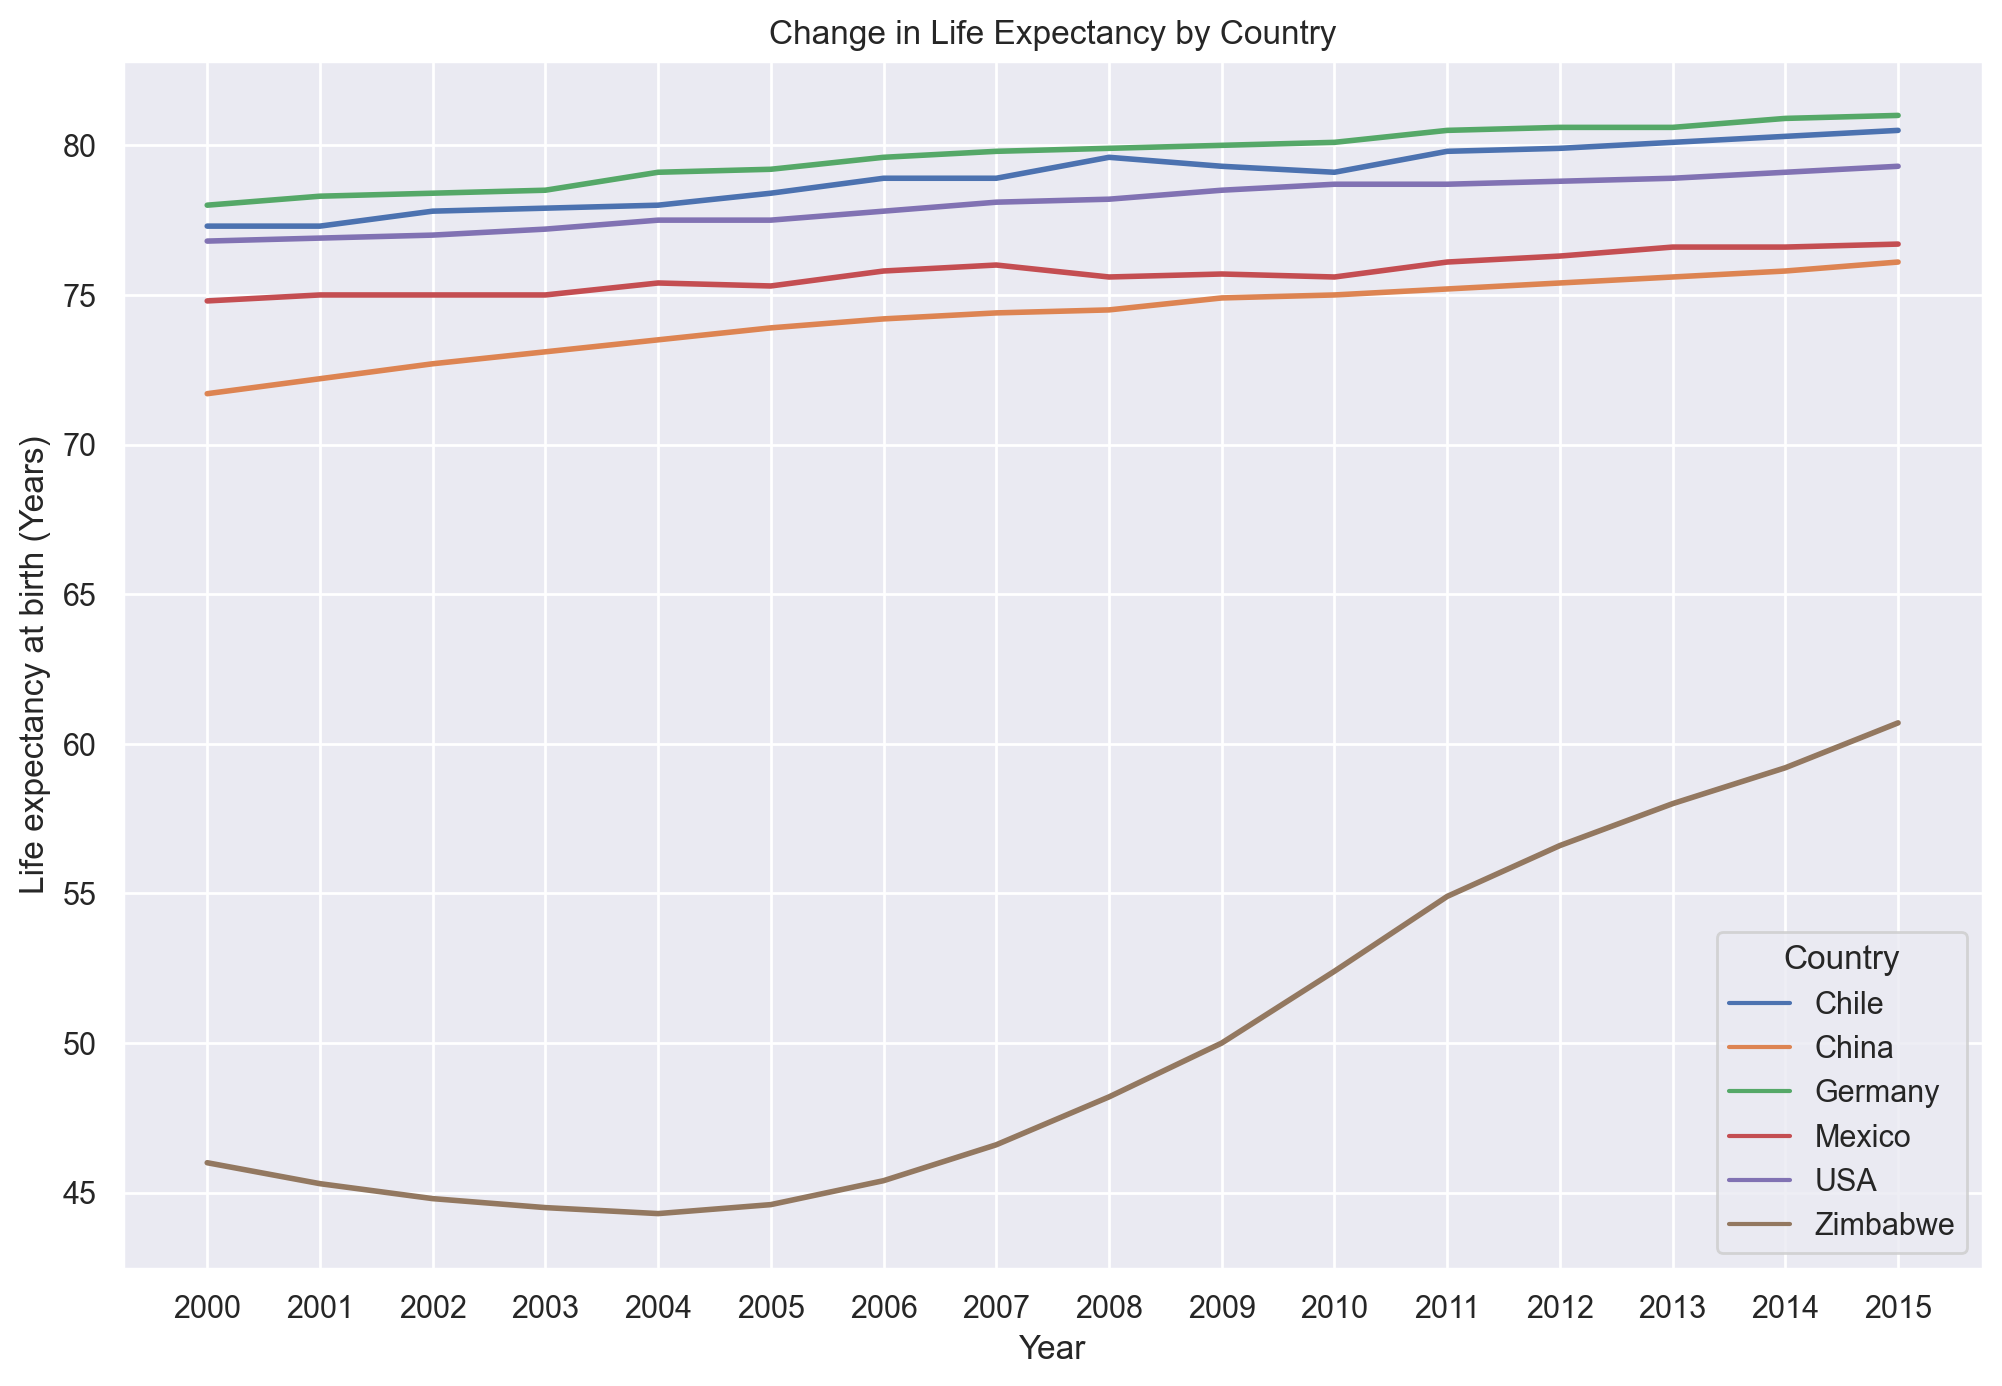

<Figure size 600x400 with 0 Axes>

In [250]:
plt.figure(figsize=(12,8))
sns.lineplot(x = df.Year, y = df.Life_expectancy, hue = df.Country, palette = sns.color_palette("deep", 6), lw = 2)
plt.ylabel('Life expectancy at birth (Years)')
plt.title('Change in Life Expectancy by Country')
plt.xticks(range(2000,2016,1))

plt.show()
plt.clf()

In [ ]:
fig = px.line(df, x = df.Year, y = df.Life_expectancy, color = 'Country', 
    labels = {'Life_expectancy': 'Life expectancy at birth (Years)'}, title = 'Change in Life Expectancy by Country')
fig.show()

We can see from the data that zimbabwe has a much lower start but greater increase in life expectancy compared to the other countries. However, due to Zimbabwe being an outlier relative to the other countries it's hard to actually compare the rest of the countries to one another as the data is just so close together. A way around this is to make a multiplot figure and plot each country individually on its own axis and compare. 

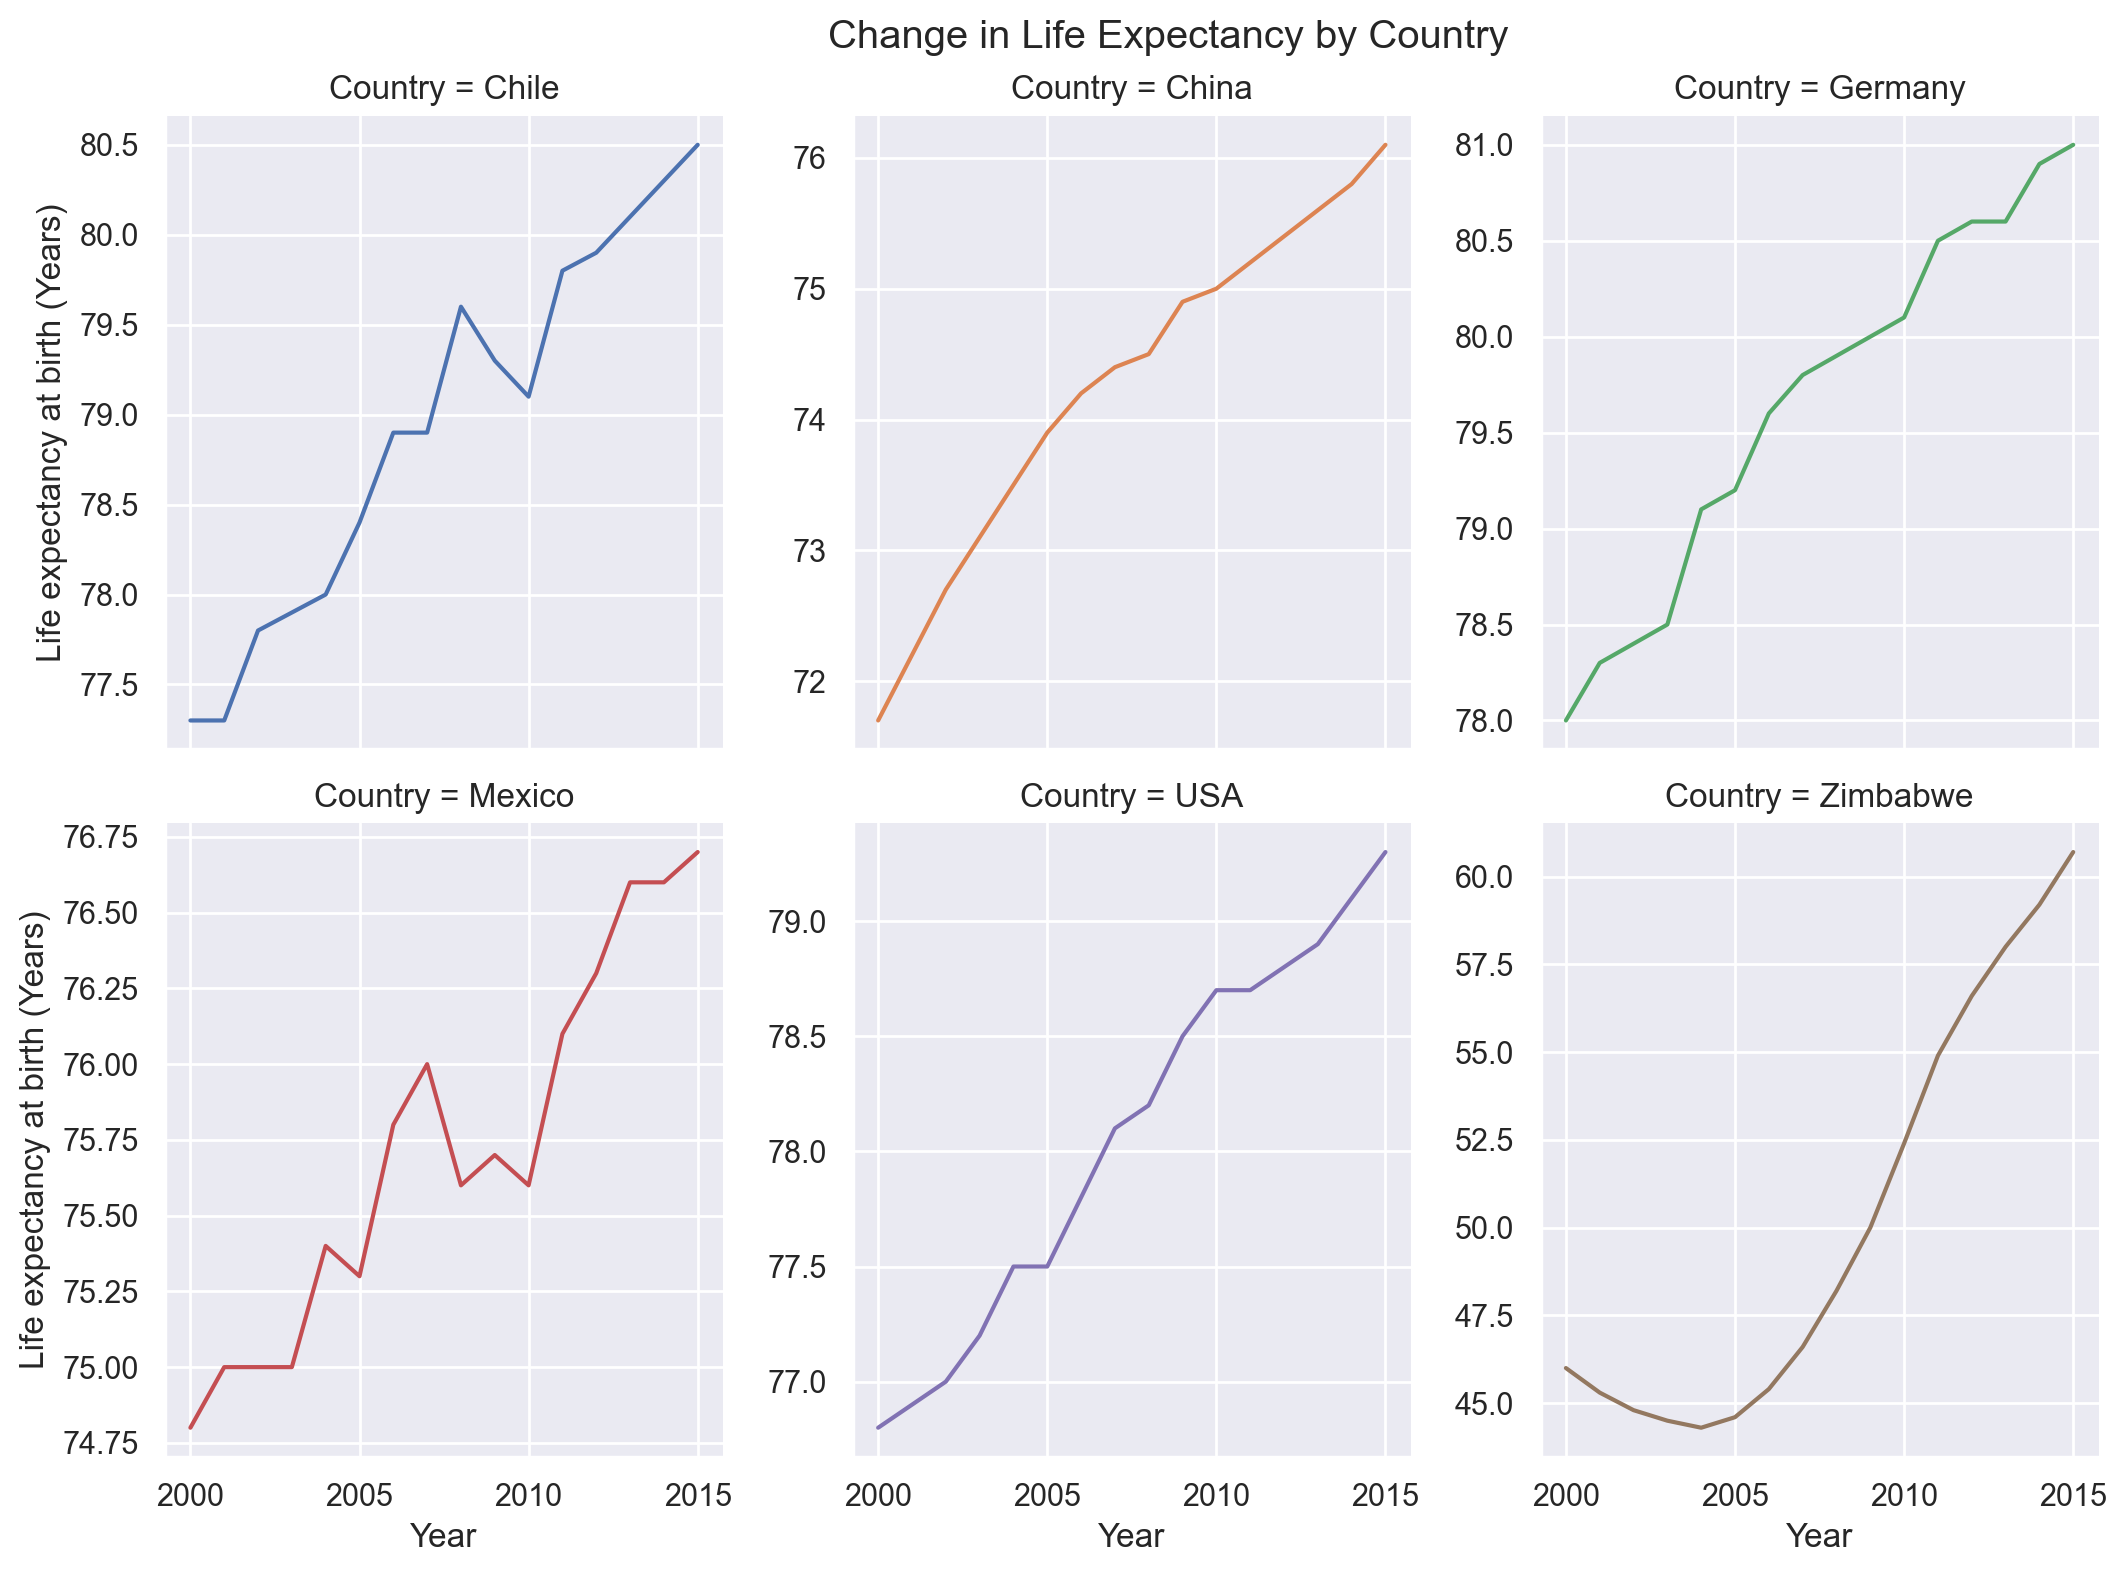

<Figure size 600x400 with 0 Axes>

In [252]:
g_life_expectancy = sns.FacetGrid(df, col = 'Country', col_wrap = 3, hue = 'Country', sharey = False, sharex = True, height = 4, aspect = 0.9)
g_life_expectancy = (g_life_expectancy.map(sns.lineplot, 'Year', 'Life_expectancy')).add_legend().set_axis_labels('Year', 
                                                                                        'Life expectancy at birth (Years)')

g_life_expectancy.fig.subplots_adjust(top = 0.92)
g_life_expectancy.fig.suptitle('Change in Life Expectancy by Country')
g_life_expectancy._legend.remove()

plt.show()
plt.clf()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows = 2, cols = 3, subplot_titles = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'], 
    shared_xaxes = True, vertical_spacing = 0.04, x_title = 'Year', y_title = 'Life expectancy at birth (Years)')

fig.add_trace(go.Line(x = df.Year , y = df.Life_expectancy[df.Country == 'Chile']), row = 1, col = 1)
fig.add_trace(go.Line(x = df.Year , y = df.Life_expectancy[df.Country == 'China']), row = 1, col = 2)
fig.add_trace(go.Line(x = df.Year , y = df.Life_expectancy[df.Country == 'Germany']), row = 1, col = 3)
fig.add_trace(go.Line(x = df.Year , y = df.Life_expectancy[df.Country == 'Mexico']), row = 2, col = 1)
fig.add_trace(go.Line(x = df.Year , y = df.Life_expectancy[df.Country == 'USA']), row = 2, col = 2)
fig.add_trace(go.Line(x = df.Year , y = df.Life_expectancy[df.Country == 'Zimbabwe']), row = 2, col = 3)


fig.update_layout(height = 800, width = 1000, title_text = "Change in Life Expectancy by Country", showlegend = False)
fig.show()

After analysing these multiplots we can gain new insights into the data. For example, Chile and Mexico seem to have dips in their life expectancy around the same time period which could be something to look into. This type of comparison was not possible before since much of the nuance was lost in the scaling of the y axis when we only had a singular plot to look at for all of the countries.

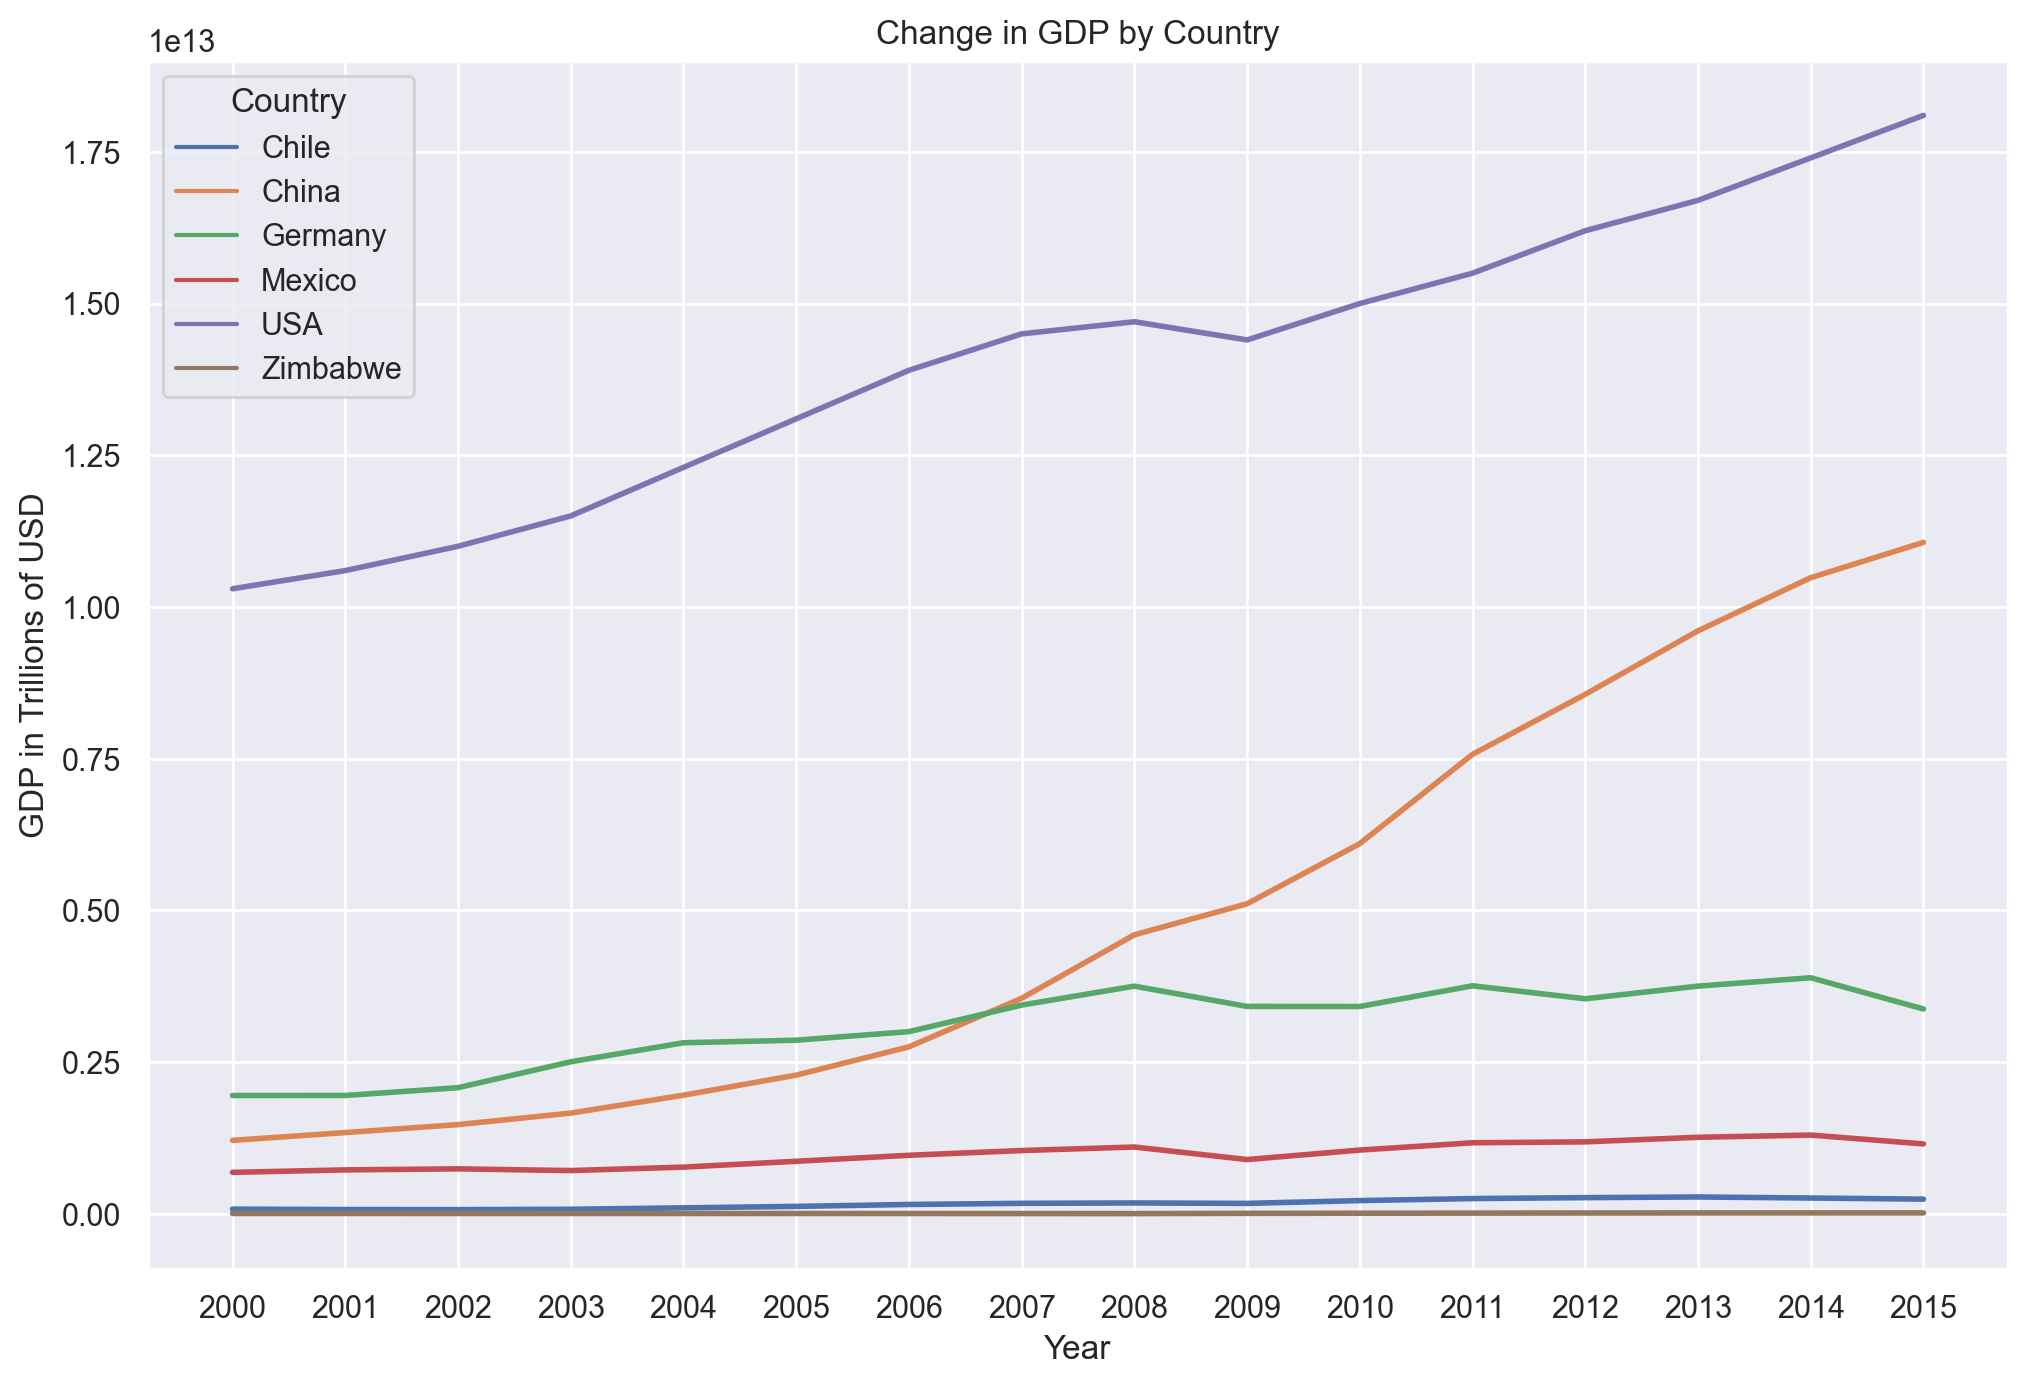

<Figure size 600x400 with 0 Axes>

In [254]:
plt.figure(figsize=(12,8))
sns.lineplot(x = df.Year, y = df.GDP, hue = df.Country, palette = sns.color_palette("deep", 6), lw = 2)
plt.ylabel('GDP in Trillions of USD')
plt.title('Change in GDP by Country')
plt.xticks(range(2000,2016,1))

plt.show()
plt.clf()

In [ ]:
fig = px.line(df, x = df.Year, y = df.GDP, color = 'Country', 
    labels = {'GDP': 'GDP in Trillions of USD'}, title = 'Change in GDP by Country')
fig.show()

We see that the United States of America dominates this statistic with China showing rapid growht compared to the rest of the countries during the time period. Unfortunately, he same problem we had with the singular plot of life expectancy with respect to time arises when we use the GDP data; it is hard to analyse and compare GDP data pertaining to Chile, Germany, Mexico and Zimbabwe, since they are so close together and the y axis is warped. To gain better insight we can once again create multiplots to better compare data.

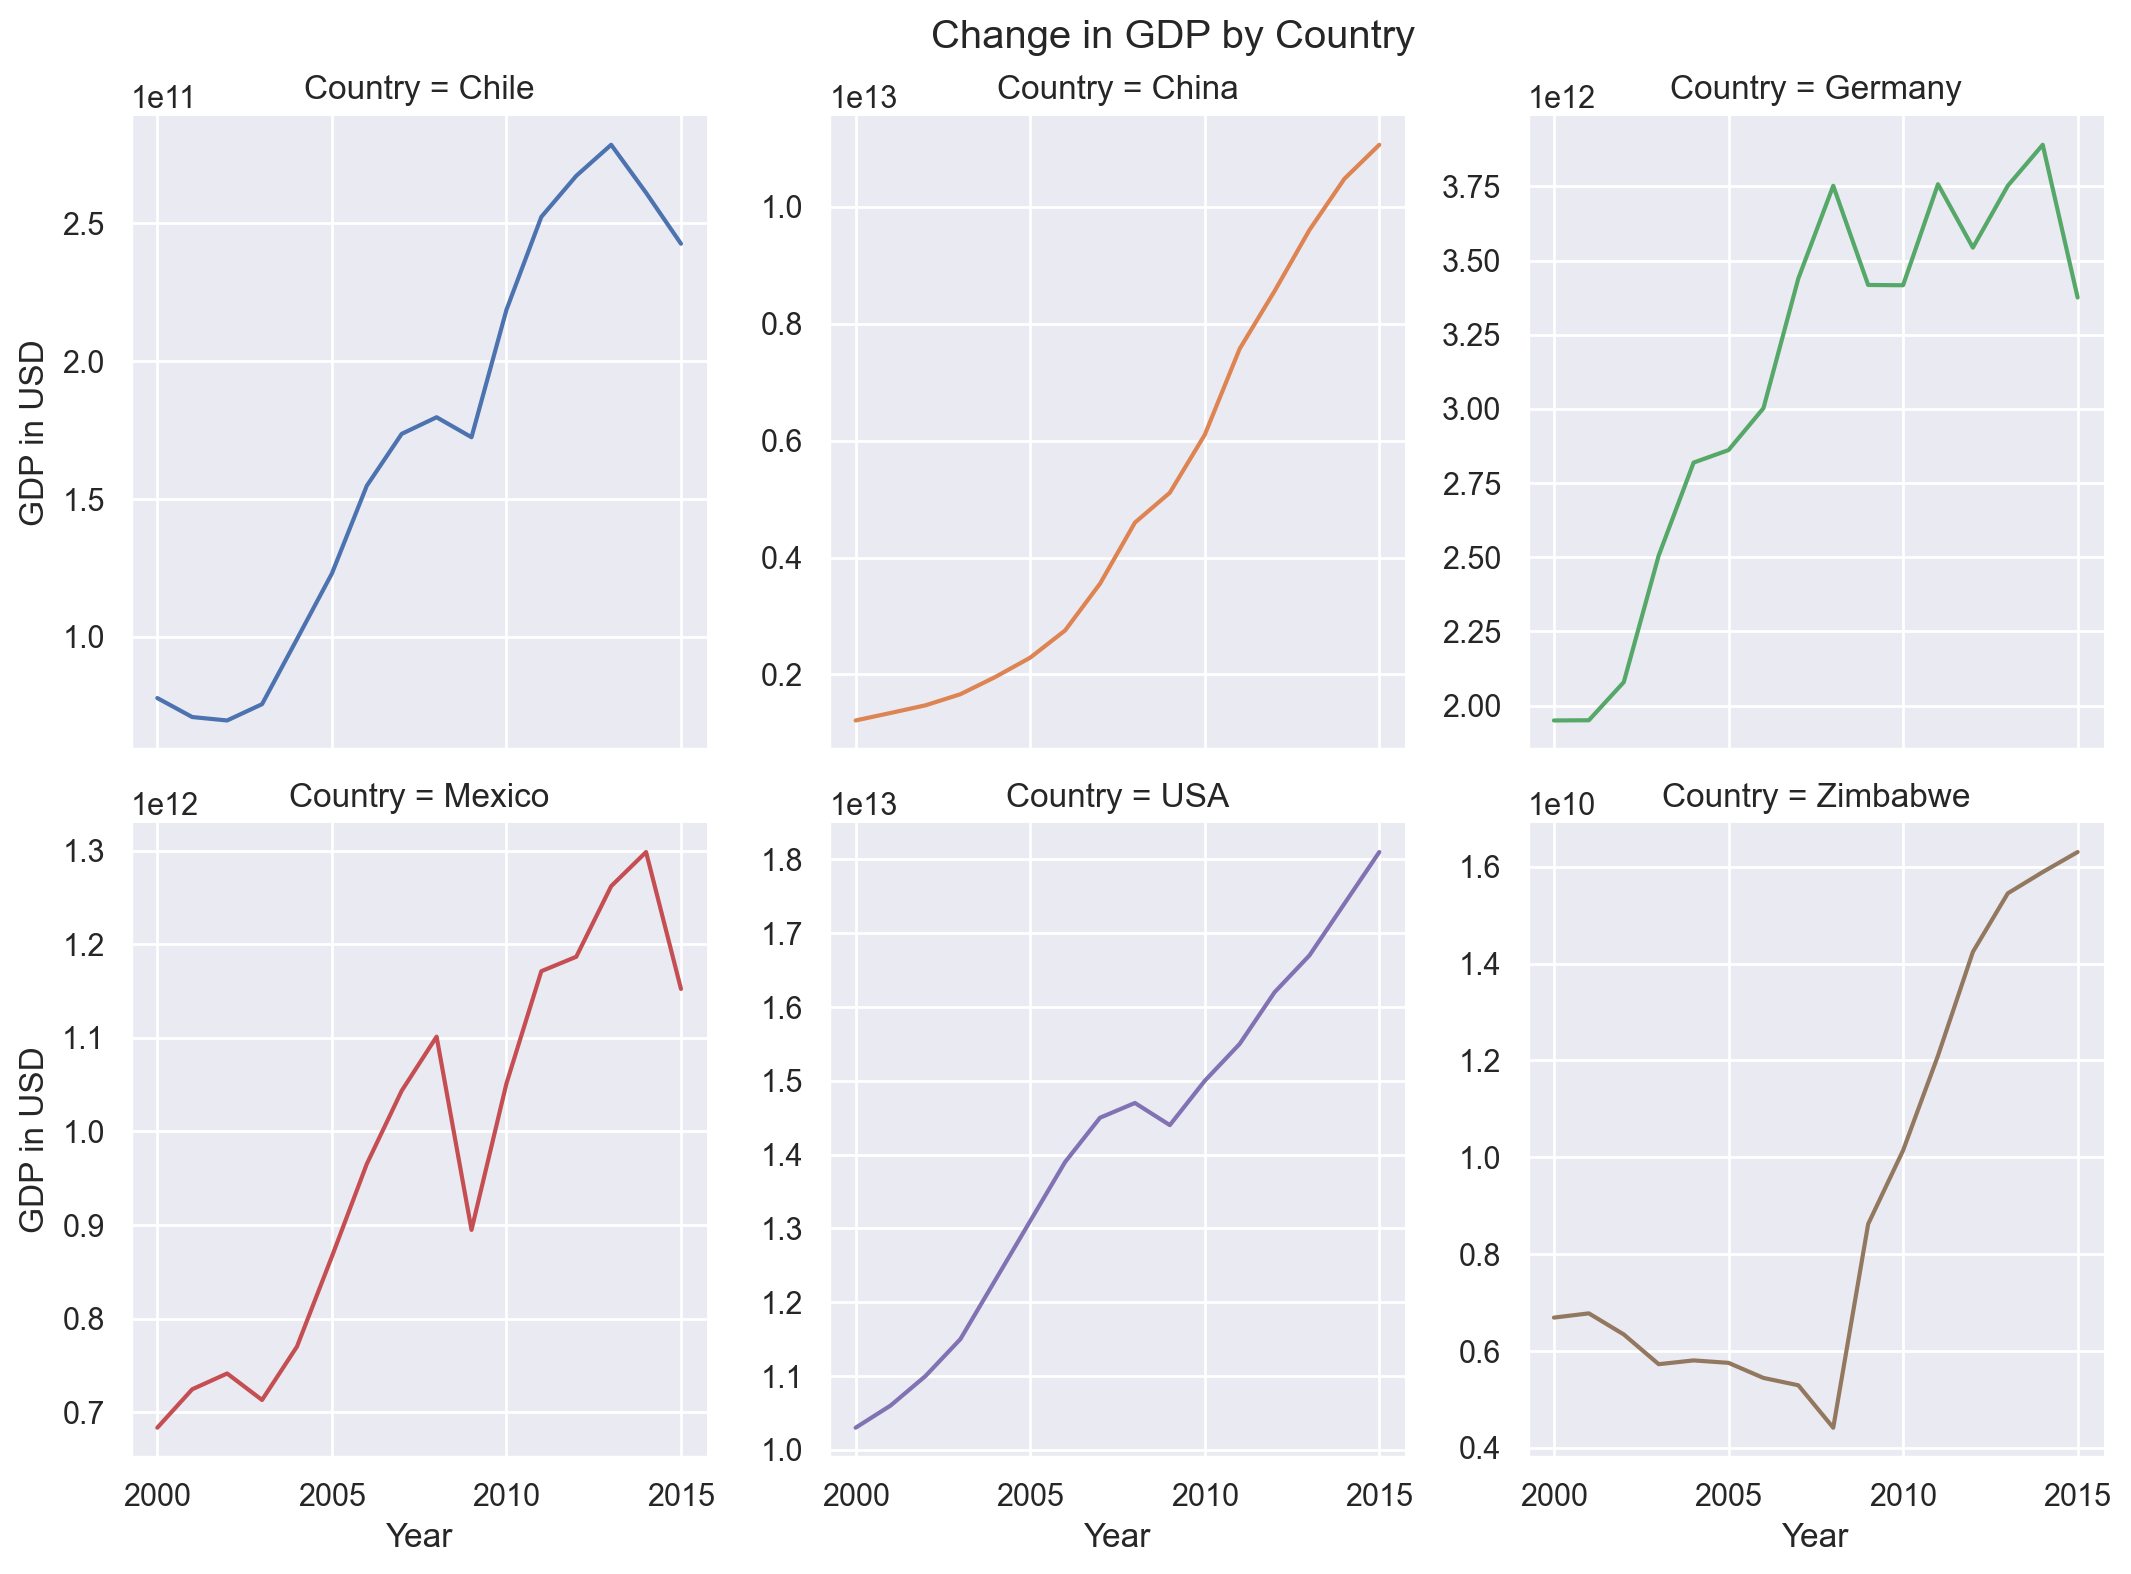

<Figure size 600x400 with 0 Axes>

In [256]:
g_GDP = sns.FacetGrid(df, col = 'Country', col_wrap = 3, hue = 'Country', sharey = False, sharex = True, height = 4, aspect = 0.9)
g_GDP = (g_GDP.map(sns.lineplot, 'Year', 'GDP')).add_legend().set_axis_labels('Year', 'GDP in USD')

g_GDP.fig.subplots_adjust(top = 0.92)
g_GDP.fig.suptitle('Change in GDP by Country')
g_GDP._legend.remove()

plt.show()
plt.clf()

In [ ]:
fig = make_subplots(rows = 2, cols = 3, subplot_titles = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'], 
    shared_xaxes = True, vertical_spacing = 0.04, x_title = 'Year', y_title = 'GDP in USD')

fig.add_trace(go.Line(x = df.Year , y = df.GDP[df.Country == 'Chile']), row = 1, col = 1)
fig.add_trace(go.Line(x = df.Year , y = df.GDP[df.Country == 'China']), row = 1, col = 2)
fig.add_trace(go.Line(x = df.Year , y = df.GDP[df.Country == 'Germany']), row = 1, col = 3)
fig.add_trace(go.Line(x = df.Year , y = df.GDP[df.Country == 'Mexico']), row = 2, col = 1)
fig.add_trace(go.Line(x = df.Year , y = df.GDP[df.Country == 'USA']), row = 2, col = 2)
fig.add_trace(go.Line(x = df.Year , y = df.GDP[df.Country == 'Zimbabwe']), row = 2, col = 3)


fig.update_layout(height = 800, width = 1000, title_text = "Change in GDP by Country", showlegend = False)
fig.show()

The multiplots give us a lot more info than the singular plot. We can see that every country experienced growth throughout the time period and also where certain countries like Mexico and Zimbabwe dipped.

## Correlation between Life Expectancy and GDP

To investigate the correlation between life expectancy and GDP we can use scatter charts.

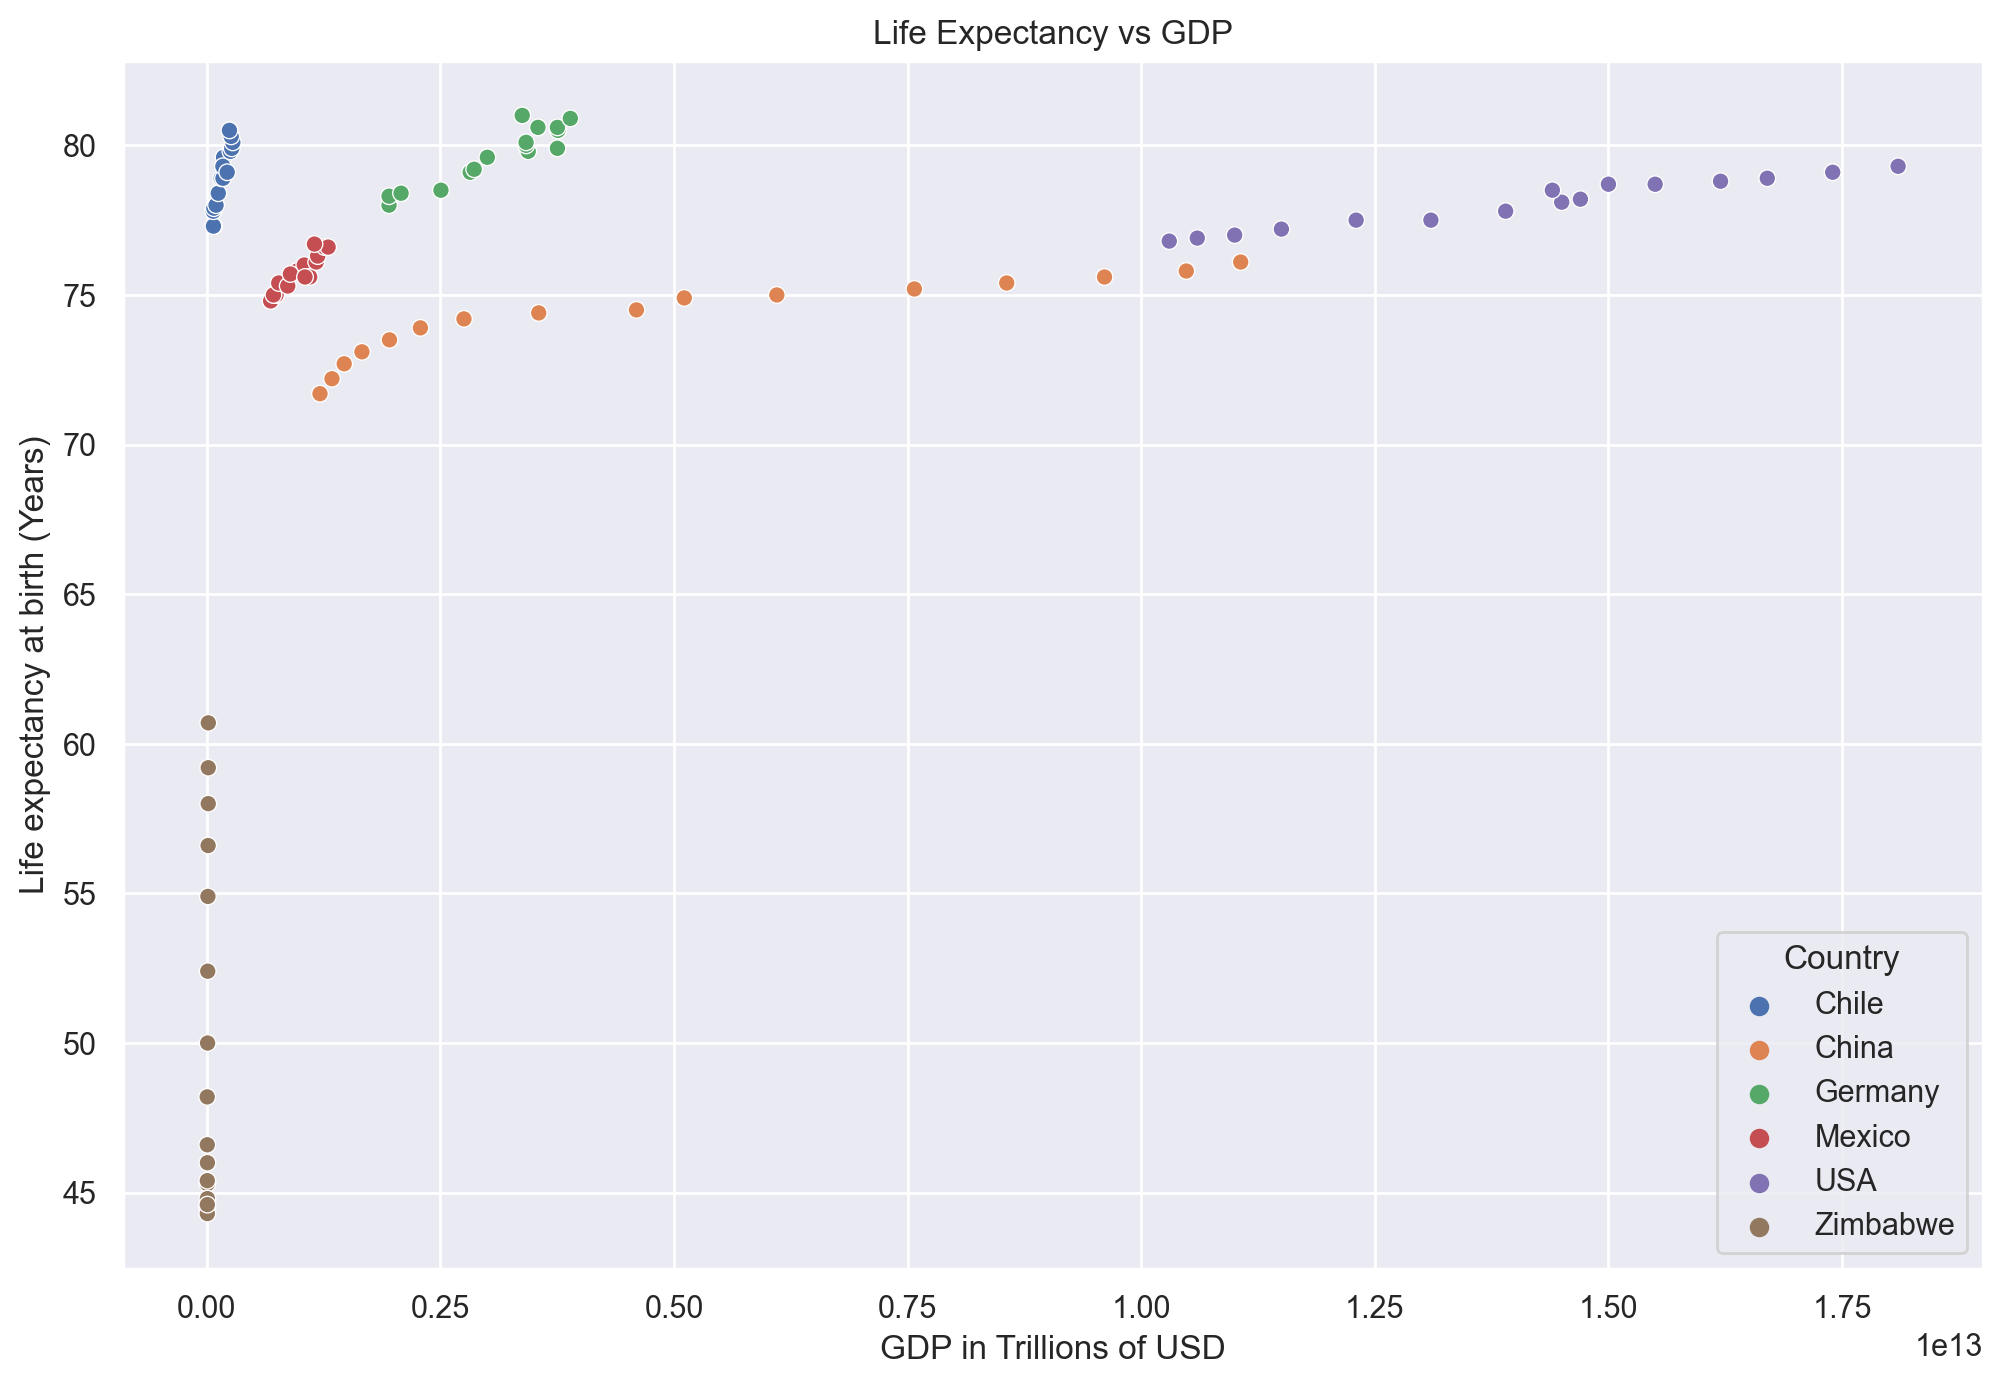

<Figure size 600x400 with 0 Axes>

In [258]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'GDP', y = 'Life_expectancy', hue = 'Country', data = df)

plt.title('Life Expectancy vs GDP')
plt.ylabel('Life expectancy at birth (Years)')
plt.xlabel('GDP in Trillions of USD')
plt.show()
plt.clf()

In [ ]:
fig = px.scatter(df, x = 'GDP', y = 'Life_expectancy', color = 'Country', title = 'Life Expectancy vs GDP',
     labels = {'Life_expectancy': 'Life expectancy at birth (Years)', 'GDP': 'GDP in Trillions of USD'})
fig.show()

Again, from the plots we can gain general information about certain countries and compare but for others it is hard. We must once again make a multiplot.

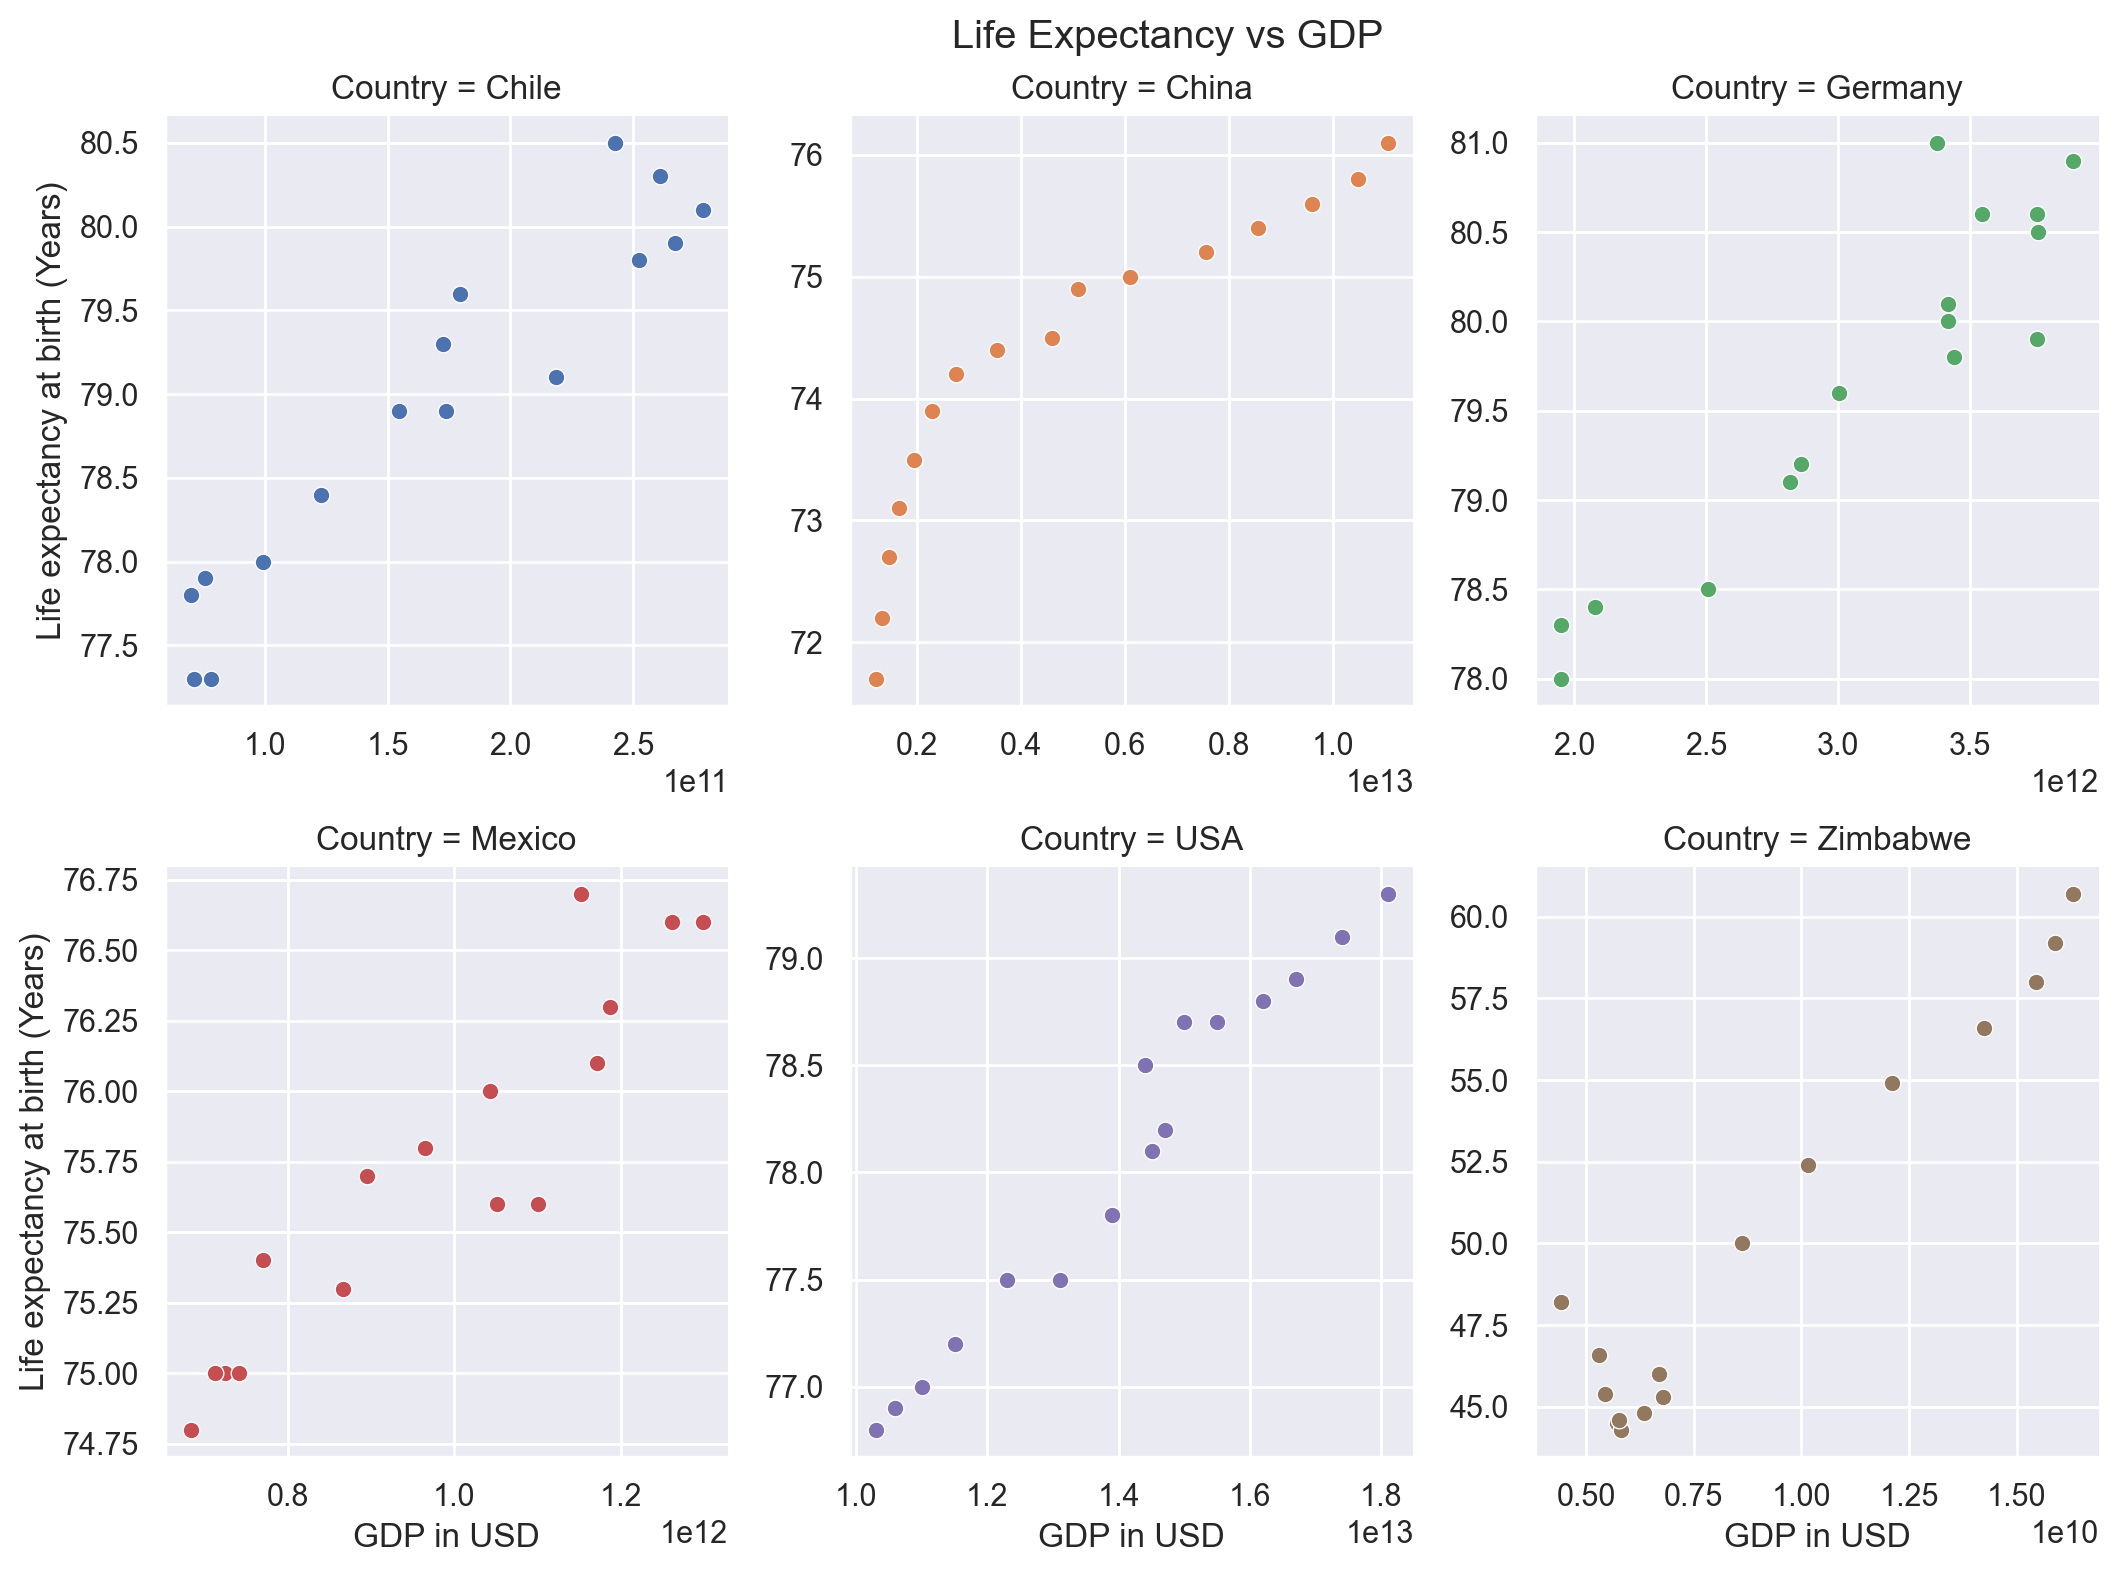

<Figure size 600x400 with 0 Axes>

In [260]:
g_scatter = sns.FacetGrid(df, col = 'Country', col_wrap = 3, hue = 'Country', sharey = False, sharex = False, height = 4, aspect = 0.9)
g_scatter = (g_scatter.map(sns.scatterplot, 'GDP', 'Life_expectancy')).add_legend().set_axis_labels('GDP in USD',
     'Life expectancy at birth (Years)')

g_scatter.fig.subplots_adjust(top = 0.92)
g_scatter.fig.suptitle('Life Expectancy vs GDP')
g_scatter._legend.remove()

plt.show()
plt.clf()

In [ ]:
fig = make_subplots(rows = 2, cols = 3, subplot_titles = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'], 
    shared_xaxes = False, shared_yaxes = False, vertical_spacing = 0.07, x_title = 'GDP in USD', y_title = 'Life expectancy at birth (Years)')

fig.add_trace(go.Scatter(x = df.GDP[df.Country == 'Chile'], y = df.Life_expectancy[df.Country == 'Chile'], mode = 'markers'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = df.GDP[df.Country == 'China'], y = df.Life_expectancy[df.Country == 'China'], mode = 'markers'), row = 1, col = 2)
fig.add_trace(go.Scatter(x = df.GDP[df.Country == 'Germany'], y = df.Life_expectancy[df.Country == 'Germany'], mode = 'markers'), row = 1, col = 3)
fig.add_trace(go.Scatter(x = df.GDP[df.Country == 'Mexico'], y = df.Life_expectancy[df.Country == 'Mexico'], mode = 'markers'), row = 2, col = 1)
fig.add_trace(go.Scatter(x = df.GDP[df.Country == 'USA'], y = df.Life_expectancy[df.Country == 'USA'], mode = 'markers'), row = 2, col = 2)
fig.add_trace(go.Scatter(x = df.GDP[df.Country == 'Zimbabwe'], y = df.Life_expectancy[df.Country == 'Zimbabwe'], mode = 'markers'), row = 2, col = 3)


fig.update_layout(height = 800, width = 1000, title_text = "Life Expectancy vs GDP", showlegend = False)
fig.show()

Looking at the individual countries we can see that most of them have a linear relationship between life epxectancy and GDP. China seems to have an exponential relationship as the growth is really rapid during the time period. Overall, from the trends seen on each plot we can conclude that there is a positive correlation between life expectancy and GDP.